In [135]:
from sklearn.datasets import fetch_covtype
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### 1. Выбрать подходящую таблицу данных. Построить и визуализировать дерево решений.

In [136]:
# берем датасет Covertype
# Прогнозирование типа лесного покрова только
# по картографическим переменным (данные дистанционного зондирования отсутствуют).

In [137]:
dataset = fetch_covtype()
target_real_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

In [138]:
dataset_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
dataset_df['target'] = dataset.target
dataset_df['target_name'] = dataset_df['target'].apply(lambda x: target_real_names[x-1])

# dataset_df = dataset_df.drop(columns=['Elevation'])
# dataset.feature_names = list(dataset_df.columns)[:-2]

In [139]:
# проанализируем датасет

In [140]:
dataset_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target,target_name
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,Aspen
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,Aspen
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Lodgepole Pine
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Lodgepole Pine
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Ponderosa Pine
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Ponderosa Pine
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Ponderosa Pine
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Ponderosa Pine


In [141]:
# в будущем будем пользоваться только частью датасета, т.к. пол миллиона строчек - очень много считать будет
dataset_df_sample = dataset_df.sample(n=5000)

In [142]:
dataset_df_sample.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2963.798800,155.631400,14.038600,274.687000,46.990600,2366.698600,212.280600,223.372200,142.440400,1980.395200,...,0.088200,0.074400,0.003600,0.004400,0.000200,0.000200,0.028600,0.025600,0.018600,2.081600
std,281.625978,111.517941,7.513827,219.691738,58.893309,1565.445066,27.116027,19.564156,38.314238,1322.495026,...,0.283614,0.262447,0.059898,0.066193,0.014142,0.014142,0.166696,0.157955,0.135121,1.433929
min,1928.000000,0.000000,0.000000,0.000000,-132.000000,0.000000,0.000000,120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2821.000000,59.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,120.000000,1019.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2998.000000,126.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,1717.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3166.000000,262.000000,18.000000,390.000000,70.000000,3369.000000,231.000000,237.000000,168.000000,2548.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3838.000000,360.000000,51.000000,1290.000000,590.000000,6818.000000,254.000000,254.000000,252.000000,7051.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [143]:
dataset_df_sample['target_name'].value_counts()

Lodgepole Pine       2447
Spruce/Fir           1789
Ponderosa Pine        308
Krummholz             205
Douglas-fir           138
Aspen                  86
Cottonwood/Willow      27
Name: target_name, dtype: int64

In [144]:
dataset_df_sample.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 165894 to 223647
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           5000 non-null   float64
 1   Aspect                              5000 non-null   float64
 2   Slope                               5000 non-null   float64
 3   Horizontal_Distance_To_Hydrology    5000 non-null   float64
 4   Vertical_Distance_To_Hydrology      5000 non-null   float64
 5   Horizontal_Distance_To_Roadways     5000 non-null   float64
 6   Hillshade_9am                       5000 non-null   float64
 7   Hillshade_Noon                      5000 non-null   float64
 8   Hillshade_3pm                       5000 non-null   float64
 9   Horizontal_Distance_To_Fire_Points  5000 non-null   float64
 10  Wilderness_Area_0                   5000 non-null   float64
 11  Wilderness_Area_1                   

In [145]:
# построим дерево решений глубиной 3

In [146]:
X = dataset_df_sample.drop(columns=['target','target_name'])
y = dataset_df_sample['target_name']

classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X, y)
y_pred = classifier.predict(X)

conf_matrix_output = pd.DataFrame(data=confusion_matrix(y, y_pred), columns=target_real_names)
conf_matrix_output.index = target_real_names

class_report_output = classification_report(y, y_pred, zero_division=0)
print(class_report_output)   #текстовый отчет, показывающий основные показатели классификации.

conf_matrix_output # какие классы как классифицировались, по горизонтали настоящие классы, по вертикали как модель решила

                   precision    recall  f1-score   support

            Aspen       0.00      0.00      0.00        86
Cottonwood/Willow       0.00      0.00      0.00        27
      Douglas-fir       0.00      0.00      0.00       138
        Krummholz       0.57      0.54      0.55       205
   Lodgepole Pine       0.71      0.81      0.75      2447
   Ponderosa Pine       0.62      0.71      0.66       308
       Spruce/Fir       0.68      0.63      0.66      1789

         accuracy                           0.69      5000
        macro avg       0.37      0.38      0.37      5000
     weighted avg       0.65      0.69      0.67      5000



,Spruce/Fir,Lodgepole Pine,Ponderosa Pine,Cottonwood/Willow,Aspen,Douglas-fir,Krummholz
Spruce/Fir,0,0,0,0,84,2,0
Lodgepole Pine,0,0,0,0,1,26,0
Ponderosa Pine,0,0,0,0,49,89,0
Cottonwood/Willow,0,0,0,110,6,0,89
Aspen,0,0,0,6,1973,17,451
Douglas-fir,0,0,0,0,90,218,0
Krummholz,0,0,0,77,577,0,1135


[Text(0.5, 0.875, 'Elevation <= 3045.5\ngini = 0.626\nsamples = 5000\nvalue = [86, 27, 138, 205, 2447, 308, 1789]\nclass = Aspen'),
 Text(0.25, 0.625, 'Elevation <= 2492.5\ngini = 0.546\nsamples = 2896\nvalue = [86, 27, 138, 1, 1861, 308, 475]\nclass = Aspen'),
 Text(0.125, 0.375, 'Horizontal_Distance_To_Hydrology <= 125.5\ngini = 0.545\nsamples = 352\nvalue = [2, 26, 89, 0, 17, 218, 0]\nclass = Douglas-fir'),
 Text(0.0625, 0.125, 'gini = 0.661\nsamples = 154\nvalue = [2, 21, 46, 0, 12, 73, 0]\nclass = Douglas-fir'),
 Text(0.1875, 0.125, 'gini = 0.415\nsamples = 198\nvalue = [0, 5, 43, 0, 5, 145, 0]\nclass = Douglas-fir'),
 Text(0.375, 0.375, 'Elevation <= 2945.5\ngini = 0.437\nsamples = 2544\nvalue = [84, 1, 49, 1, 1844, 90, 475]\nclass = Aspen'),
 Text(0.3125, 0.125, 'gini = 0.413\nsamples = 1683\nvalue = [83, 1, 49, 1, 1269, 90, 190]\nclass = Aspen'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 861\nvalue = [1, 0, 0, 0, 575, 0, 285]\nclass = Aspen'),
 Text(0.75, 0.625, 'Elevation 

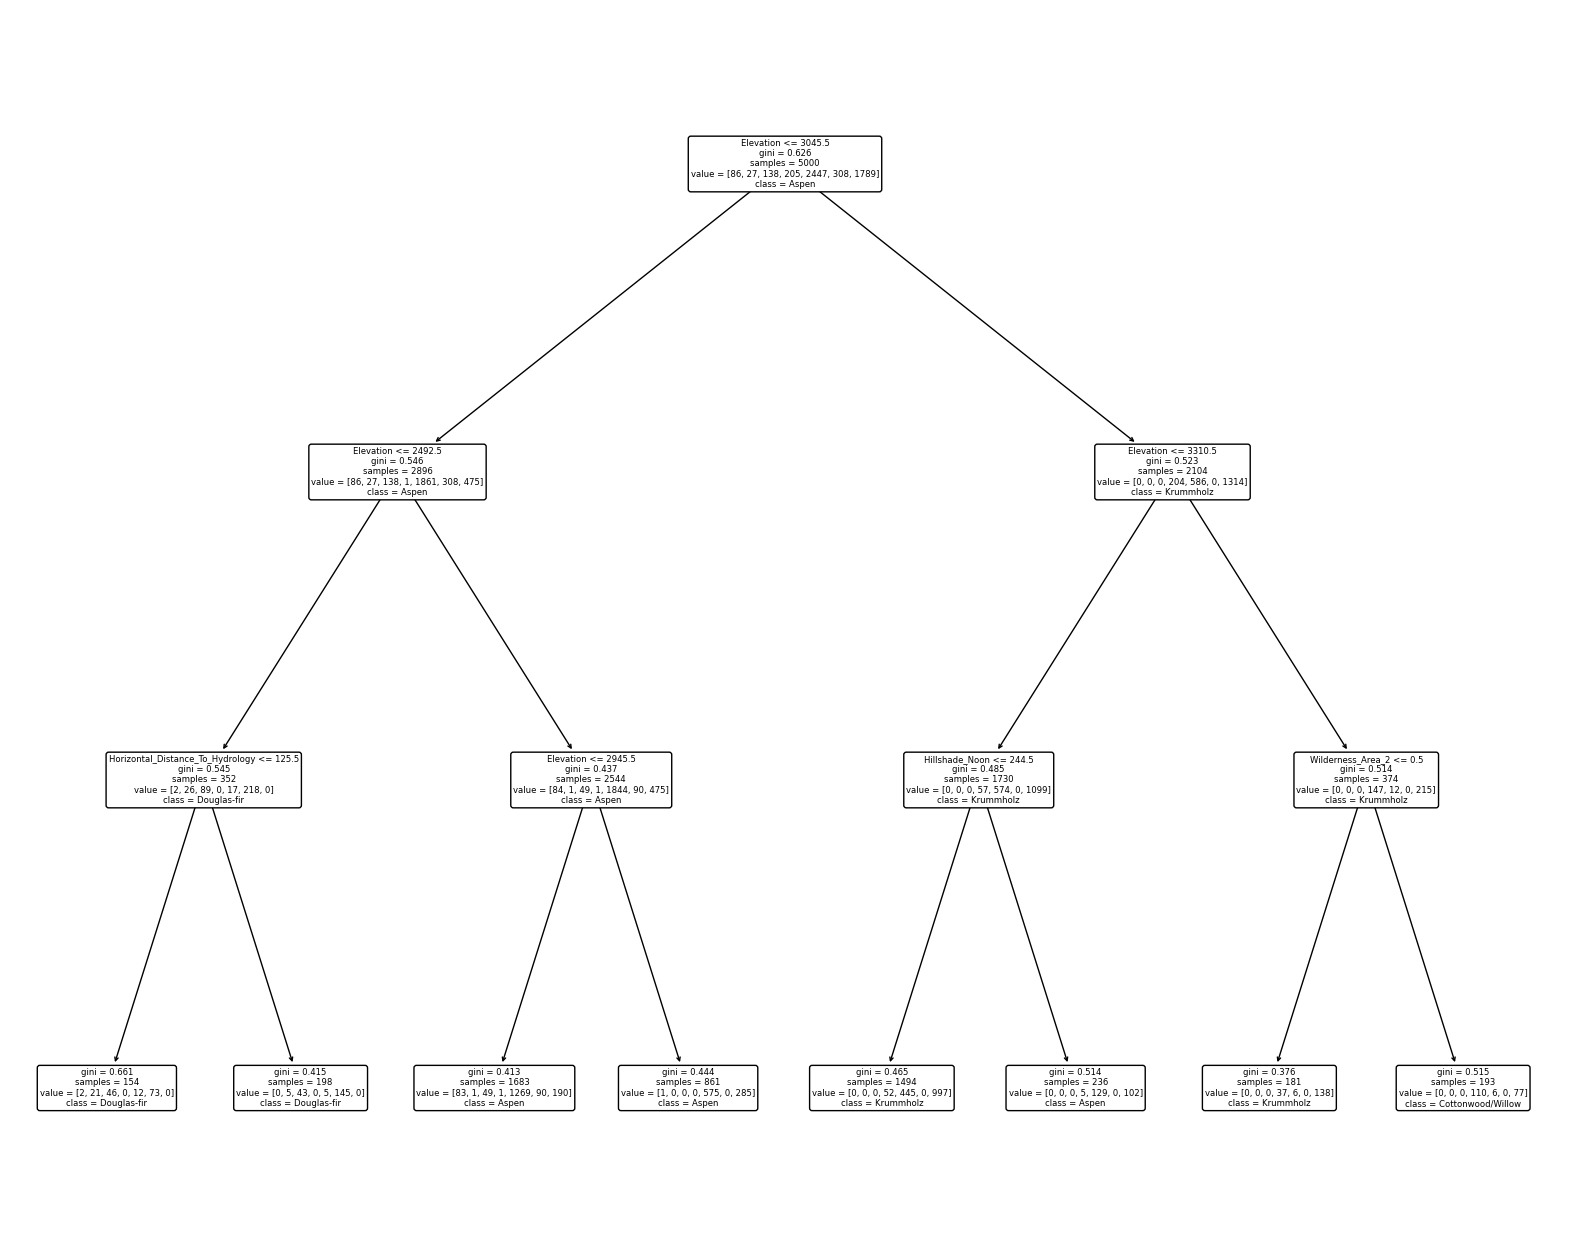

In [147]:
plt.figure(figsize=(20, 16))
plot_tree(classifier, feature_names = dataset.feature_names, class_names = target_real_names, rounded = True)
#нет слева, да справа

### 2. Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.

In [148]:
gbc = GradientBoostingClassifier()
gbc.fit(X, y)
y_pred = gbc.predict(X)

conf_matrix_output = pd.DataFrame(data=confusion_matrix(y, y_pred), columns=target_real_names)
conf_matrix_output.index = target_real_names

class_report_output = classification_report(y, y_pred, zero_division=0)
print(class_report_output)

conf_matrix_output

                   precision    recall  f1-score   support

            Aspen       0.93      0.65      0.77        86
Cottonwood/Willow       1.00      1.00      1.00        27
      Douglas-fir       0.90      0.75      0.82       138
        Krummholz       0.95      0.86      0.91       205
   Lodgepole Pine       0.84      0.86      0.85      2447
   Ponderosa Pine       0.94      0.94      0.94       308
       Spruce/Fir       0.81      0.81      0.81      1789

         accuracy                           0.84      5000
        macro avg       0.91      0.84      0.87      5000
     weighted avg       0.85      0.84      0.84      5000



,Spruce/Fir,Lodgepole Pine,Ponderosa Pine,Cottonwood/Willow,Aspen,Douglas-fir,Krummholz
Spruce/Fir,56,0,0,0,30,0,0
Lodgepole Pine,0,27,0,0,0,0,0
Ponderosa Pine,0,0,104,0,25,9,0
Cottonwood/Willow,0,0,0,177,0,0,28
Aspen,2,0,8,0,2113,8,316
Douglas-fir,1,0,2,0,15,290,0
Krummholz,1,0,1,9,320,0,1458


[Text(0.5416666666666666, 0.875, 'Soil_Type_16 <= 0.5\nfriedman_mse = 0.017\nsamples = 5000\nvalue = 0.0'),
 Text(0.3333333333333333, 0.625, 'Elevation <= 2922.5\nfriedman_mse = 0.015\nsamples = 4967\nvalue = -0.002'),
 Text(0.16666666666666666, 0.375, 'Horizontal_Distance_To_Roadways <= 269.0\nfriedman_mse = 0.039\nsamples = 1816\nvalue = 0.024'),
 Text(0.08333333333333333, 0.125, 'friedman_mse = 0.155\nsamples = 89\nvalue = 8.813'),
 Text(0.25, 0.125, 'friedman_mse = 0.032\nsamples = 1727\nvalue = 0.801'),
 Text(0.5, 0.375, 'Horizontal_Distance_To_Roadways <= 340.5\nfriedman_mse = 0.001\nsamples = 3151\nvalue = -0.017'),
 Text(0.4166666666666667, 0.125, 'friedman_mse = 0.015\nsamples = 66\nvalue = -0.104'),
 Text(0.5833333333333334, 0.125, 'friedman_mse = 0.0\nsamples = 3085\nvalue = -0.856'),
 Text(0.75, 0.625, 'Elevation <= 2594.5\nfriedman_mse = 0.211\nsamples = 33\nvalue = 0.286'),
 Text(0.6666666666666666, 0.375, 'friedman_mse = 0.0\nsamples = 16\nvalue = -0.872'),
 Text(0.83333

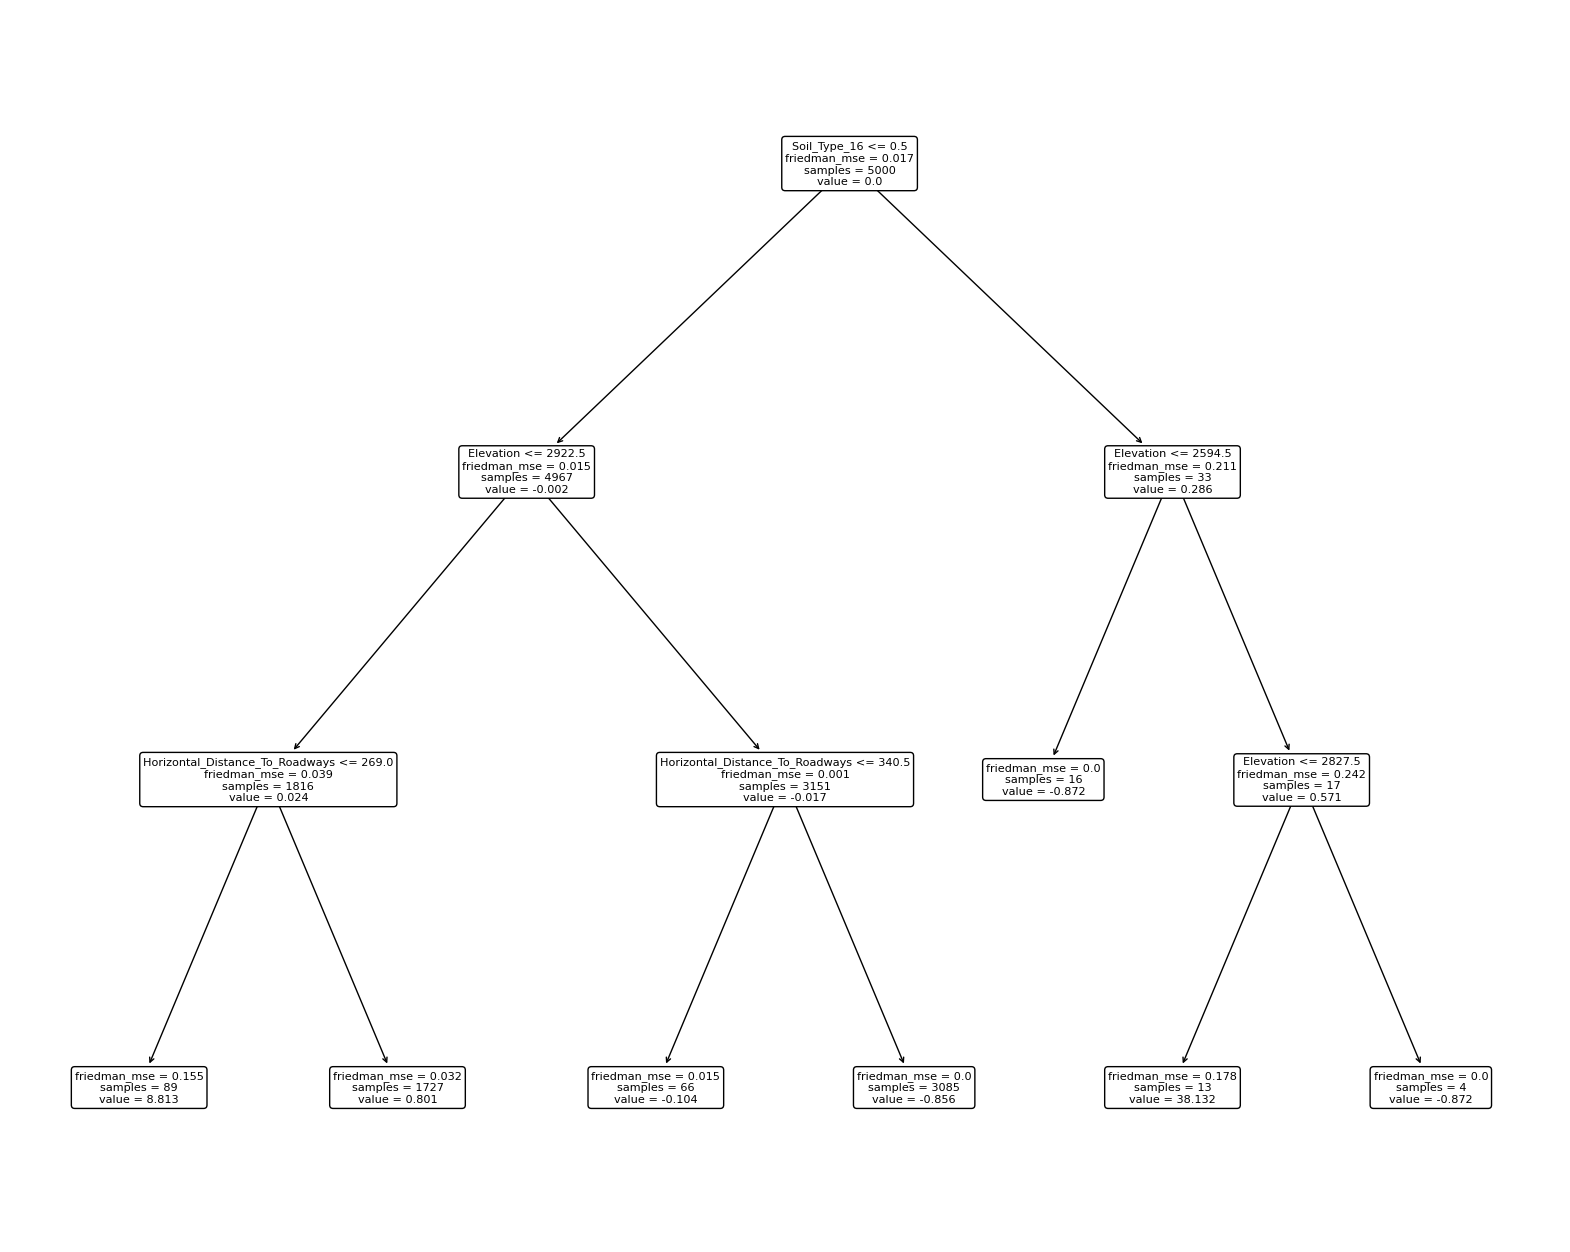

In [149]:
sub_tree_00 = gbc.estimators_[0, 0]
plt.figure(figsize=(20, 16))
plot_tree(sub_tree_00, feature_names = dataset.feature_names, class_names = target_real_names, rounded = True)

[Text(0.5, 0.875, 'Elevation <= 2922.5\nfriedman_mse = 0.016\nsamples = 5000\nvalue = -0.001'),
 Text(0.25, 0.625, 'Hillshade_9am <= 245.5\nfriedman_mse = 0.04\nsamples = 1848\nvalue = 0.023'),
 Text(0.125, 0.375, 'Slope <= 44.5\nfriedman_mse = 0.033\nsamples = 1725\nvalue = 0.015'),
 Text(0.0625, 0.125, 'friedman_mse = 0.032\nsamples = 1724\nvalue = 0.627'),
 Text(0.1875, 0.125, 'friedman_mse = 0.0\nsamples = 1\nvalue = 21.437'),
 Text(0.375, 0.375, 'Soil_Type_29 <= 0.5\nfriedman_mse = 0.128\nsamples = 123\nvalue = 0.136'),
 Text(0.3125, 0.125, 'friedman_mse = 0.067\nsamples = 96\nvalue = 2.832'),
 Text(0.4375, 0.125, 'friedman_mse = 0.243\nsamples = 27\nvalue = 14.8'),
 Text(0.75, 0.625, 'Horizontal_Distance_To_Roadways <= 340.5\nfriedman_mse = 0.001\nsamples = 3152\nvalue = -0.015'),
 Text(0.625, 0.375, 'Horizontal_Distance_To_Roadways <= 337.0\nfriedman_mse = 0.015\nsamples = 66\nvalue = -0.002'),
 Text(0.5625, 0.125, 'friedman_mse = 0.0\nsamples = 64\nvalue = -0.872'),
 Text(0.687

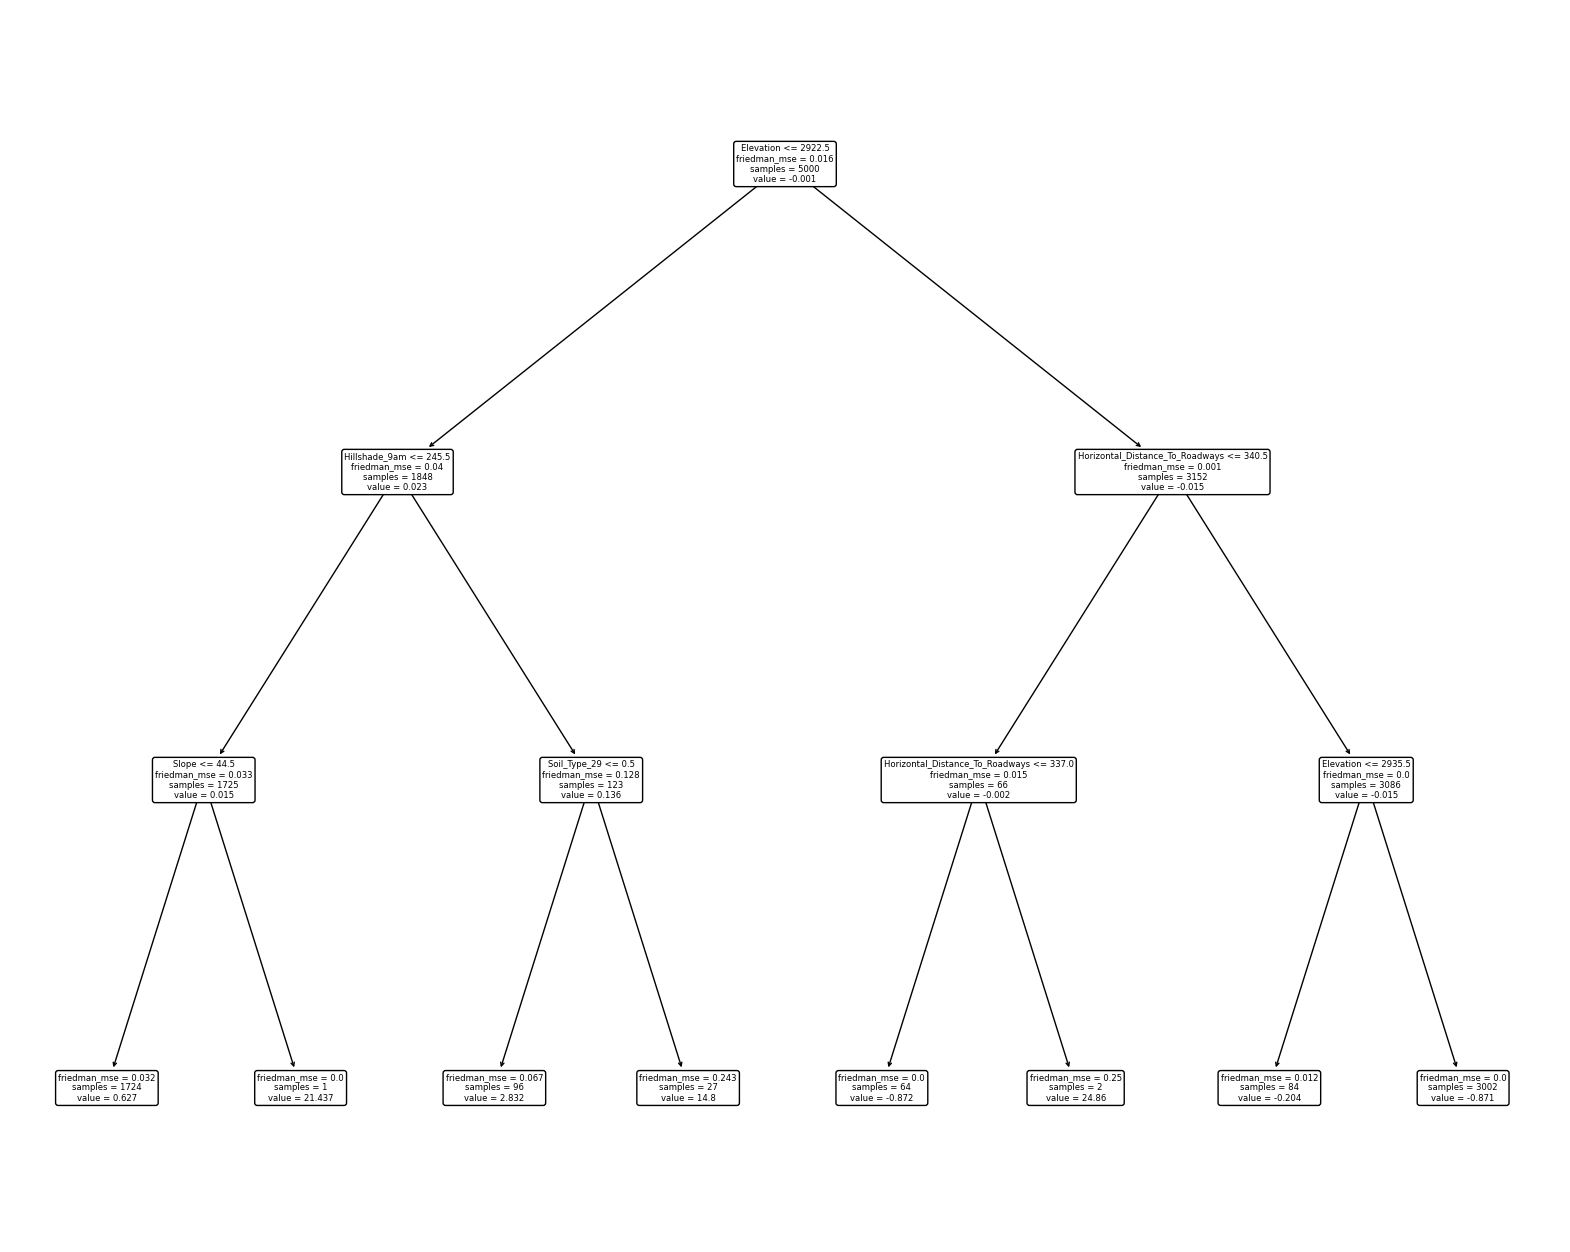

In [150]:
sub_tree_00 = gbc.estimators_[1, 0]
plt.figure(figsize=(20, 16))
plot_tree(sub_tree_00, feature_names = dataset.feature_names, class_names = target_real_names, rounded = True)

In [151]:
#значимость переменных
importance = gbc.feature_importances_
importance_out = pd.DataFrame()
importance_out['feature_name'] = dataset.feature_names
importance_out['importance'] = importance
importance_out.sort_values('importance', ascending=False).head(5)

,feature_name,importance
0,Elevation,0.581080
5,Horizontal_Distance_To_Roadways,0.084601
9,Horizontal_Distance_To_Fire_Points,0.047847
3,Horizontal_Distance_To_Hydrology,0.038879
7,Hillshade_Noon,0.030942


### 3. Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева. 

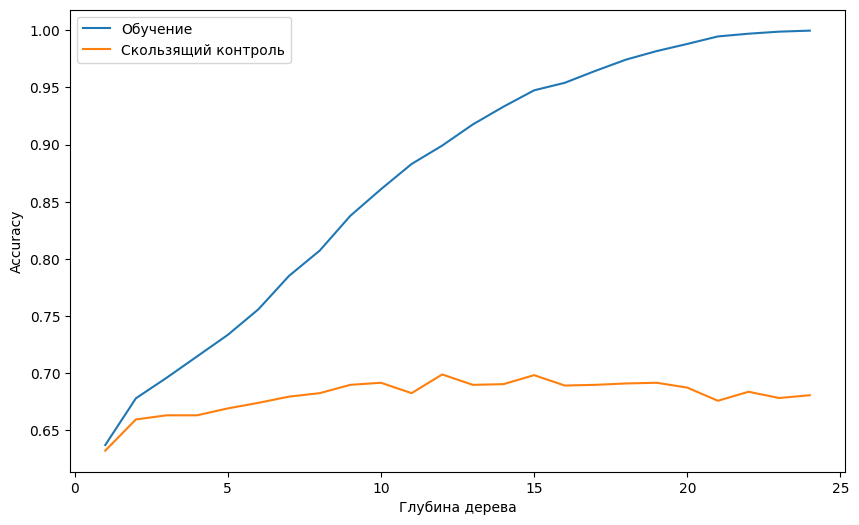

In [152]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

train_scores = []
test_scores = []

max_depth_values = range(1,25)
for max_depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, train_scores, label='Обучение')
plt.plot(max_depth_values, test_scores, label='Скользящий контроль')
plt.xlabel('Глубина дерева')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4. Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев. Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров

In [153]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

train_scores = []
test_scores = []

max_depth_values = range(1,25,3)
max_tree_values = range(1,25,3)
for max_depth in max_depth_values:
    train_scores_temp = []
    test_scores_temp = []
    for max_tree in max_tree_values:
        gbc = GradientBoostingClassifier(n_estimators=max_tree, max_depth=max_depth)
        gbc.fit(X_train, y_train)

        y_train_pred = gbc.predict(X_train)
        y_test_pred = gbc.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_scores_temp.append(train_accuracy)
        test_scores_temp.append(test_accuracy)
    train_scores.append(np.array(train_scores_temp))
    test_scores.append(np.array(test_scores_temp))
    
train_scores = np.array(train_scores)    
test_scores = np.array(test_scores)

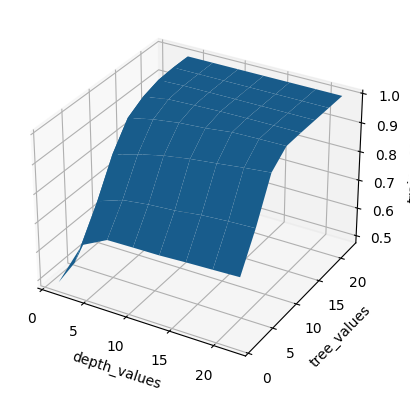

Максимум: depth - 13 trees - 16 value - 1.0


In [154]:
ax = plt.figure().add_subplot(projection='3d')
x_3d, y_3d = np.meshgrid(list(max_depth_values), list(max_tree_values))
surf = ax.plot_surface(x_3d, y_3d, train_scores, linewidth=0)
ax.set_xlabel('depth_values')
ax.set_ylabel('tree_values')
ax.set_zlabel('train_scores')
plt.show()

i,j = np.unravel_index(train_scores.argmax(), train_scores.shape)
print('Максимум: depth -', list(max_depth_values)[i], 'trees -', list(max_tree_values)[j], 'value -',train_scores.max())

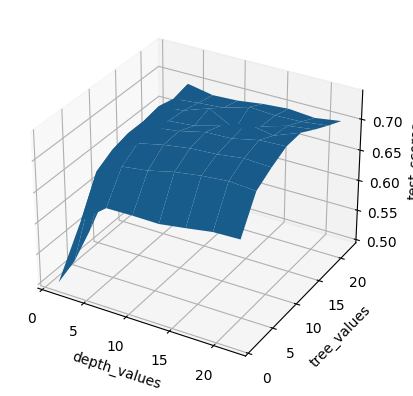

Максимум: depth - 13 trees - 16 value - 0.7412121212121212


In [155]:
ax = plt.figure().add_subplot(projection='3d')
x_3d, y_3d = np.meshgrid(list(max_depth_values), list(max_tree_values))
surf = ax.plot_surface(x_3d, y_3d, test_scores, linewidth=0)
ax.set_xlabel('depth_values')
ax.set_ylabel('tree_values')
ax.set_zlabel('test_scores')
plt.show()

i,j = np.unravel_index(train_scores.argmax(), test_scores.shape)
print('Максимум: depth -', list(max_depth_values)[i], 'trees -', list(max_tree_values)[j], 'value -',test_scores.max())

### 5. Выполнить предыдущий пункт для случайного леса

In [156]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

train_scores = []
test_scores = []

max_depth_values = range(1,35,3)
max_tree_values = range(1,35,3)
for max_depth in max_depth_values:
    train_scores_temp = []
    test_scores_temp = []
    for max_tree in max_tree_values:
        rfc = RandomForestClassifier(n_estimators=max_tree, max_depth=max_depth)
        rfc.fit(X_train, y_train)

        y_train_pred = rfc.predict(X_train)
        y_test_pred = rfc.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_scores_temp.append(train_accuracy)
        test_scores_temp.append(test_accuracy)
    train_scores.append(np.array(train_scores_temp))
    test_scores.append(np.array(test_scores_temp))
    
train_scores = np.array(train_scores)    
test_scores = np.array(test_scores)

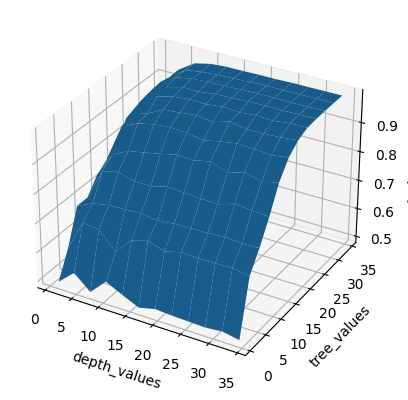

Максимум: depth - 31 trees - 34 value - 0.9997014925373134


In [157]:
ax = plt.figure().add_subplot(projection='3d')
x_3d, y_3d = np.meshgrid(list(max_depth_values), list(max_tree_values))
surf = ax.plot_surface(x_3d, y_3d, train_scores, linewidth=0)
ax.set_xlabel('depth_values')
ax.set_ylabel('tree_values')
ax.set_zlabel('train_scores')
plt.show()

i,j = np.unravel_index(train_scores.argmax(), train_scores.shape)
print('Максимум: depth -', list(max_depth_values)[i], 'trees -', list(max_tree_values)[j], 'value -',train_scores.max())

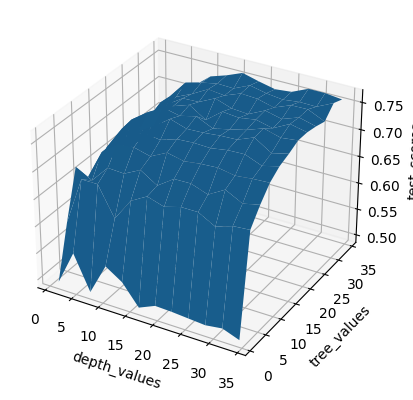

Максимум: depth - 31 trees - 34 value - 0.7672727272727272


In [158]:
ax = plt.figure().add_subplot(projection='3d')
x_3d, y_3d = np.meshgrid(list(max_depth_values), list(max_tree_values))
surf = ax.plot_surface(x_3d, y_3d, test_scores, linewidth=0)
ax.set_xlabel('depth_values')
ax.set_ylabel('tree_values')
ax.set_zlabel('test_scores')
plt.show()

i,j = np.unravel_index(train_scores.argmax(), test_scores.shape)
print('Максимум: depth -', list(max_depth_values)[i], 'trees -', list(max_tree_values)[j], 'value -',test_scores.max())